In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, timedelta

In [2]:
column_names = ["Month","DayM", "YearM", "TempM"]

In [4]:
df=pd.read_csv('https://academic.udayton.edu/kissock/http/weather/gsod95-current/FLMIAMIB.txt', delim_whitespace=True,names=column_names)
miesiąceM = df. Month. to_list()
dniM = df. DayM. to_list()
rokM = df. YearM. to_list()
temperaturaFM = df. TempM. to_list()
df

,Month,DayM,YearM,TempM
0,1,1,1995,72.1
1,1,2,1995,72.9
2,1,3,1995,72.9
3,1,4,1995,71.8
4,1,5,1995,66.9
...,...,...,...,...
9260,5,9,2020,78.1
9261,5,10,2020,76.8
9262,5,11,2020,76.0
9263,5,12,2020,78.8


In [4]:

def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)
daty=[]
start_dt = date(2005, 1, 1)
end_dt = date(2005, 12, 31)
for dt in daterange(start_dt, end_dt):
    daty.append(dt.strftime("%d.%m"))

In [5]:
temperaturaCM=[]
for i in range(len(temperaturaFM)):
    C=(temperaturaFM[i]-32)/1.8000
    temperaturaCM.append(round(C,1))
    
   

In [6]:
Miami=[]
for i in range(len(dniM)):
    l2=[]
    l2.append(dniM[i])
    l2.append(miesiąceM[i])
    l2.append(rokM[i])
    l2.append(temperaturaCM[i])
    Miami.append(l2)

In [7]:
column_names = ["MonthS","DayS", "YearS", "TempS"]
df=pd.read_csv('https://academic.udayton.edu/kissock/http/Weather/gsod95-current/SBCOLMBO.txt', delim_whitespace=True,names=column_names)
miesiąceS = df. MonthS. to_list()
dniS = df. DayS. to_list()
rokS = df. YearS. to_list()
temperaturaFS = df. TempS. to_list()

temperaturaCS=[]
for i in range(len(temperaturaFS)):
    C=(temperaturaFS[i]-32)/1.8000
    temperaturaCS.append(round(C,1))
      

In [8]:
Sri_Lanka=[]
for i in range(len(dniS)):
    l2=[]
    l2.append(dniS[i])
    l2.append(miesiąceS[i])
    l2.append(rokS[i])
    l2.append(temperaturaCS[i])
    Sri_Lanka.append(l2)

In [9]:
Miami_2005=[]
for i in range(3653,4018):
    Miami_2005.append(Miami[i])

In [10]:
Sri_Lanka_2005=[]
for i in range(3653,4018):
    Sri_Lanka_2005.append(Sri_Lanka[i])  

In [11]:
TempM=[]
for i in range(len(Miami_2005)):
    TempM.append(Miami_2005[i][3])     

In [12]:
TEMPM=np.array(TempM)

In [13]:
TempS=[]
for i in range(len(Sri_Lanka_2005)):
    TempS.append(Sri_Lanka_2005[i][3])

In [14]:
TEMPS=np.array(TempS)

In [15]:
czas=np.array(daty)

In [16]:
TempMS=[]
for i in range(len(TempM)):
    l3=[]
    l3.append(TempM[i])
    l3.append(TempS[i])
    TempMS.append(l3) 

In [17]:
i1=0
i2=0
a=0
for i in range(len(TempMS)):
    b=abs(TempMS[i][0]-TempMS[i][1])
    if b > a:
        a=b
        i1=i
c=0       
for i in range(len(TempMS)):
    b=TempMS[i][1]-TempMS[i][0]
    if b < c:
        c=b 
        i2=i
c=abs(c)

In [18]:
napis=str(czas[i1])+'  '+str(round(a,2))+'$^{\circ} C$'
napis1=str(czas[i2])+'  '+str(round(c,2))+'$^{\circ} C$'

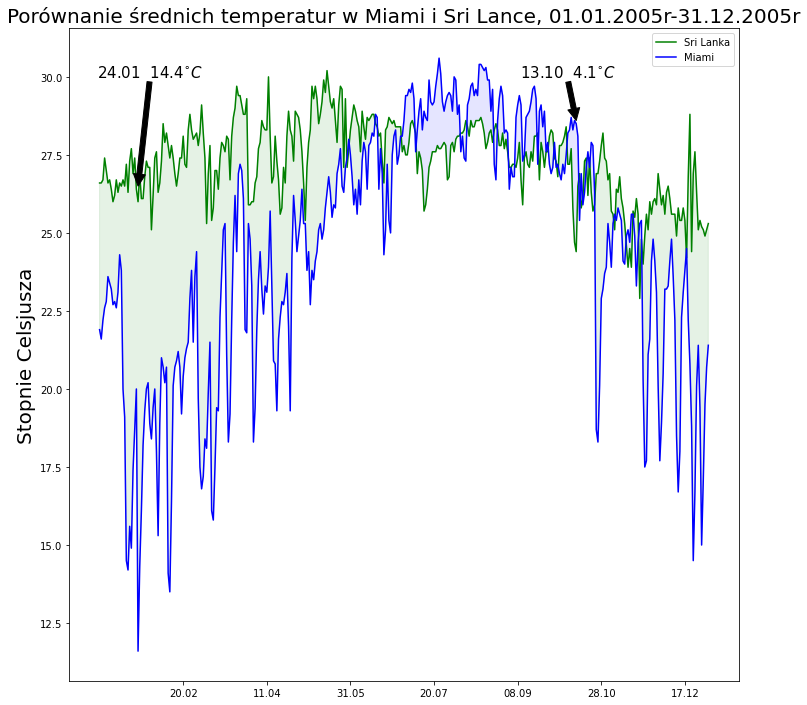

In [30]:
fig,ax=plt.subplots(figsize=(12,12))

ax.plot(czas,TEMPS,color='green')
ax.plot(czas,TEMPM,color='blue')

plt.annotate(napis,xy=(i1, TempS[i1]+0.5),size=15, ha='center',xytext=(30,30),arrowprops=dict(width=5,facecolor='black'))

plt.annotate(napis1,xy=(i2, TempM[i2]+0.1),size=15, ha='center',xytext=(280,30),arrowprops=dict(width=5,facecolor='black'))

ax.set_xticks([50,100,150,200,250,300,350])

ax.fill_between(
    czas,TEMPS,TEMPM,where=(TEMPS>TEMPM),
    interpolate=True,color='green',alpha=0.1,
    label='Sri Lanka')

ax.fill_between(
    czas,TEMPS,TEMPM,where=(TEMPS<TEMPM),
    interpolate=True,color='blue',alpha=0.1,
    label='Miami')
ax.set_ylabel('Stopnie Celsjusza',size=20)
ax.legend(labels=["Sri Lanka","Miami",])
plt.title('Porównanie średnich temperatur w Miami i Sri Lance, 01.01.2005r-31.12.2005r',size=20)
plt.savefig('07_Ort_272194')
plt.show()